In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image


In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
#!/bin/bash
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [01:31<00:00, 30.6MB/s]
100% 2.70G/2.70G [01:31<00:00, 31.5MB/s]


In [ ]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("/content/new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
!pip install torchsummary

In [ ]:
 import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [ ]:
data_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [ ]:
# printing the disease names
print(diseases)

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Potato___Early_blight', 'Blueberry___healthy', 'Tomato___healthy', 'Squash___Powdery_mildew', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___healthy', 'Peach___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Leaf_Mold', 'Soybean___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Cedar_apple_rust', 'Corn_(maize)___healthy', 'Potato___healthy', 'Pepper,_bell___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___Leaf_scorch', 'Cherry_(including_sour)___healthy', 'Corn_(maize)__

In [ ]:
print("Total disease classes are: {}".format(len(diseases)))


Total disease classes are: 38


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Corn_(maize)', 'Tomato', 'Potato', 'Blueberry', 'Squash', 'Grape', 'Raspberry', 'Apple', 'Cherry_(including_sour)', 'Peach', 'Soybean', 'Orange', 'Pepper,_bell', 'Strawberry']


In [ ]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [ ]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


In [ ]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Tomato___Early_blight                                        1920
Tomato___Septoria_leaf_spot                                  1745
Tomato___Late_blight                                         1851
Potato___Early_blight                                        1939
Blueberry___healthy                                          1816
Tomato___healthy                                             1926
Squash___Powdery_mildew                                      1736
Grape___Esca_(Black_Measles)                                 1920
Raspberry___healthy                                          1781
Apple___Apple_scab                                           2016
Grape___Black_rot                                            1888
Tomato___Bacterial_spot                                      1702
Tomato___Target_Spot                                         1827
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Potato___Late_blight                                         1939
Cherry_(including_sour)___Powdery_mildew                     1683
Peach___healthy                                              1728
Peach___Bacterial_spot                                       1838
Tomato___Tomato_mosaic_virus                                 1790
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Leaf_Mold                                           1882
Soybean___healthy                                            2022
Orange___Haunglongbing_(Citrus_greening)                     2010
Pepper,_bell___Bacterial_spot                                1913
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Apple___Cedar_apple_rust                                     1760
Corn_(maize)___healthy                                       1859
Potato___healthy                                             1824
Pepper,_bell___healthy                                       1988
Corn_(maize)___Northern_Leaf_Blight                          1908
Strawberry___Leaf_scorch                                     1774
Cherry_(including_sour)___healthy                            1826
Corn_(maize)___Common_rust_                                  1907
Grape___healthy                                              1692
Apple___healthy                                              2008
Strawberry___healthy                                         1824
Apple___Black_rot                                            1987

Text(0.5, 1.0, 'Images per each class of plant disease')

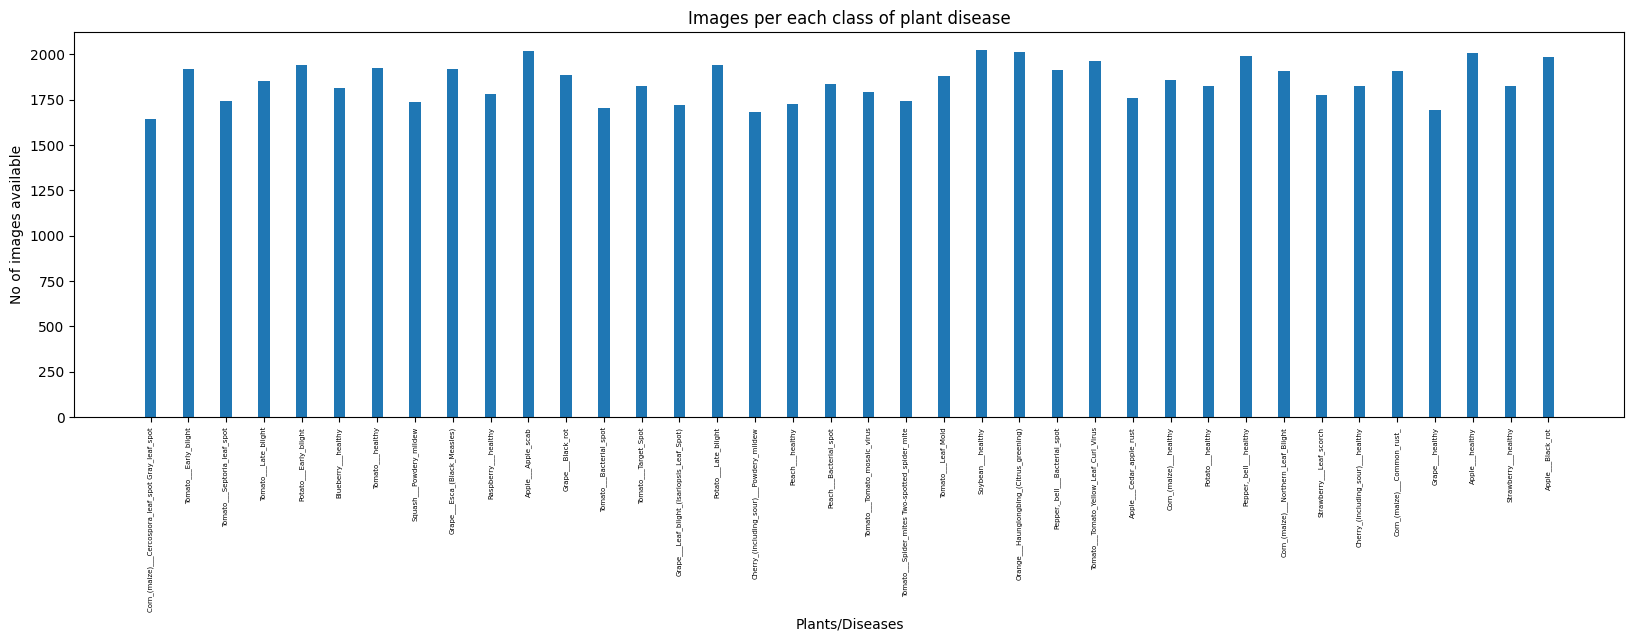

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [ ]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


In [ ]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

In [ ]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [ ]:
# total number of classes in train set
len(train.classes)

38

In [ ]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


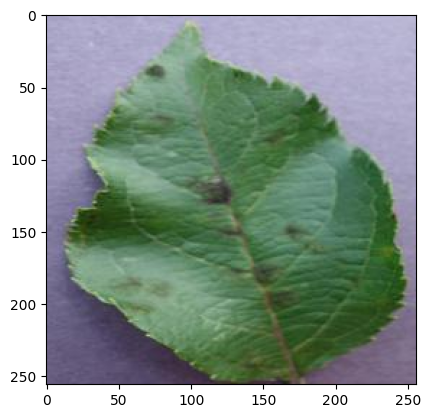

In [ ]:
show_image(*train[0])

Label :Tomato___Septoria_leaf_spot(32)


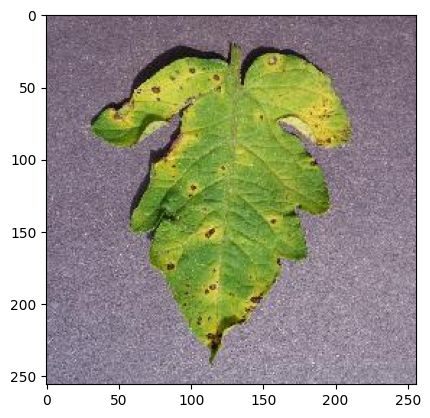

In [ ]:
show_image(*train[60000])

Label :Peach___Bacterial_spot(16)


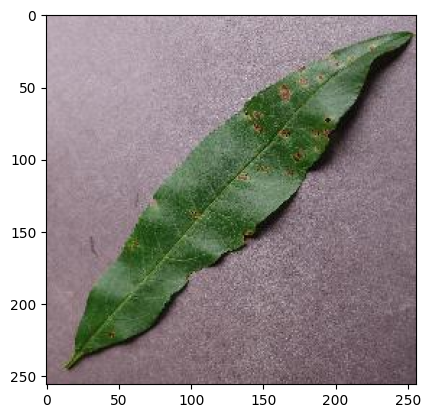

In [ ]:
show_image(*train[30000])

In [ ]:
# Setting the seed value
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
# setting the batch size
batch_size = 32

In [ ]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [ ]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

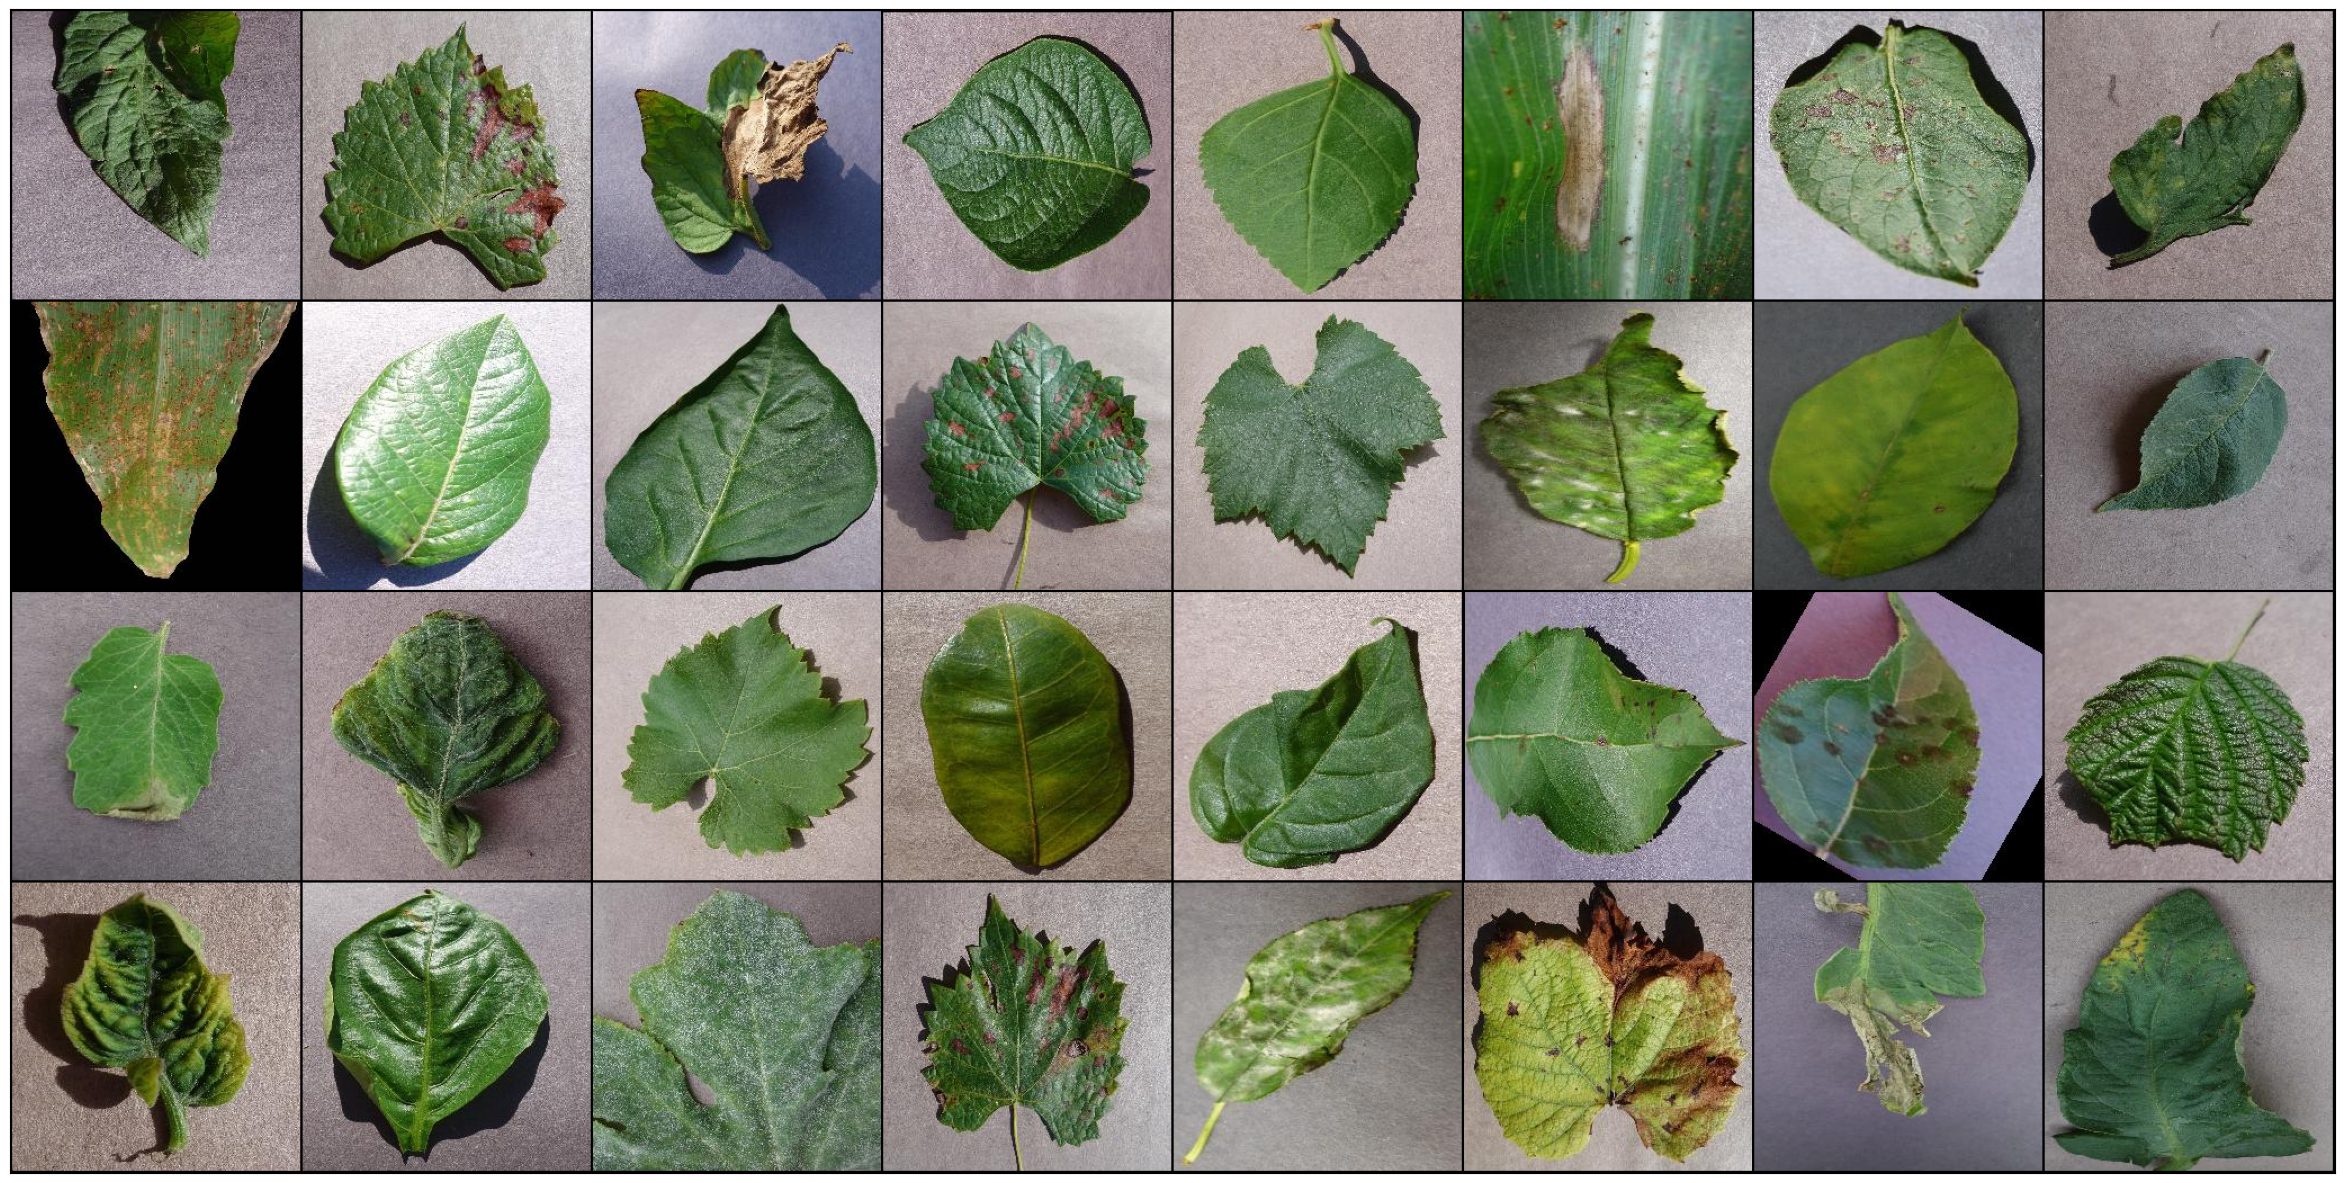

In [ ]:
# Images for first batch of training
show_batch(train_dl)

In [ ]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)  # Get the index of the max log-probability
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss  # Return loss as a tensor, not a dictionary

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracies = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss
        epoch_accuracy = torch.stack(batch_accuracies).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies

    def training_epoch_end(self, outputs):
        batch_losses = [x["train_loss"] for x in outputs]
        batch_accuracies = [x["train_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss
        epoch_accuracy = torch.stack(batch_accuracies).mean()
        return {"train_loss": epoch_loss, "train_accuracy": epoch_accuracy} # Combine accuracies

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['train_accuracy'], result['val_loss'], result['val_accuracy']))


In [ ]:
# Architecture for training

# Convolutional block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


class ResNet14(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()

        # Initial convolutional layers
        self.conv1 = ConvBlock(in_channels, 64)                # Output: 64 x H x W
        self.conv2 = ConvBlock(64, 128, pool=True)             # Output: 128 x H/4 x W/4

        # Residual block 1
        self.res1 = nn.Sequential(
            ConvBlock(128, 128),
            ConvBlock(128, 128)
        )

        # Additional convolutional layers
        self.conv3 = ConvBlock(128, 256, pool=True)            # Output: 256 x H/16 x W/16
        self.conv4 = ConvBlock(256, 512, pool=True)            # Output: 512 x H/64 x W/64

        # Residual block 2
        self.res2 = nn.Sequential(
            ConvBlock(512, 512),
            ConvBlock(512, 512)
        )

        # New convolutional layer for deeper structure
        self.conv5 = ConvBlock(512, 1024, pool=True)           # Output: 1024 x H/256 x W/256

        # Residual block 3
        self.res3 = nn.Sequential(
            ConvBlock(1024, 1024),
            ConvBlock(1024, 1024)
        )

        # Updated Classifier with Global Average Pooling
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),                      # Global pooling to 1x1 spatial dimensions
            nn.Flatten(),                                      # Flatten features
            nn.Linear(1024, num_diseases)                      # Fully connected layer
        )

    def forward(self, xb):
        out = self.conv1(xb)                                   # Conv1
        out = self.conv2(out)                                  # Conv2
        out = self.res1(out) + out                             # Residual block 1
        out = self.conv3(out)                                  # Conv3
        out = self.conv4(out)                                  # Conv4
        out = self.res2(out) + out                             # Residual block 2
        out = self.conv5(out)                                  # Conv5
        out = self.res3(out) + out                             # Residual block 3
        out = self.classifier(out)                             # Classifier
        return out


In [ ]:
# defining the model and moving it to the GPU
model = to_device(ResNet14(3, len(train.classes)), device)
model

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
from torchsummary import summary

# Define input shape (RGB images of size 256x256)
INPUT_SHAPE = (3, 256, 256)

# Print summary of the model
print(summary(model.cuda(), INPUT_SHAPE))


In [ ]:
# Function to evaluate the model
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

# Function to get learning rate
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

# Function to train the model using the One Cycle LR Policy
def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Scheduler for one-cycle learning rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        train_accuracies = []  # Collect training accuracies
        lrs = []

        for batch in train_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            # Forward pass and loss calculation
            out = model(images)
            loss = F.cross_entropy(out, labels)
            train_losses.append(loss)

            # Calculate accuracy
            acc = accuracy(out, labels)
            train_accuracies.append(acc)

            # Backpropagation
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record learning rates
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_accuracy'] = torch.stack(train_accuracies).mean().item()  # Calculate mean training accuracy
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)

    return history



In [ ]:
%%time
history = [evaluate(model, valid_dl)]
history

In [ ]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl,
                             grad_clip=grad_clip,
                             weight_decay=1e-4,
                             opt_func=opt_func)

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

In [ ]:
plot_accuracies(history)

In [ ]:
plot_losses(history)

NameError: name 'plot_losses' is not defined

In [ ]:
def plot_metrics(history):
    # Extract metrics from history
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x.get('val_loss') for x in history]
    train_accuracies = [x.get('train_accuracy') for x in history]
    val_accuracies = [x.get('val_accuracy') for x in history]

    # Plot Loss curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, '-bx', label='Training Loss')
    plt.plot(val_losses, '-rx', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs. Epochs')

    # Plot Accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, '-bx', label='Training Accuracy')
    plt.plot(val_accuracies, '-rx', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epochs')

    plt.tight_layout()
    plt.show()


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

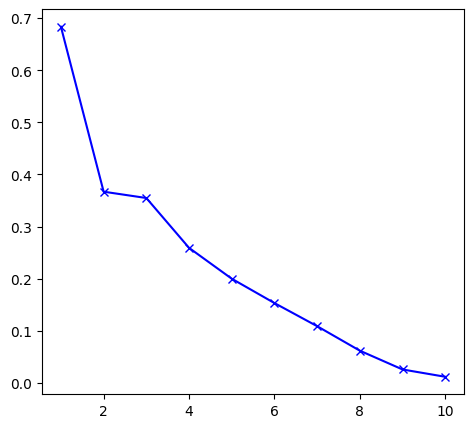

In [ ]:
plot_metrics(history)


## Learning Rate overtime

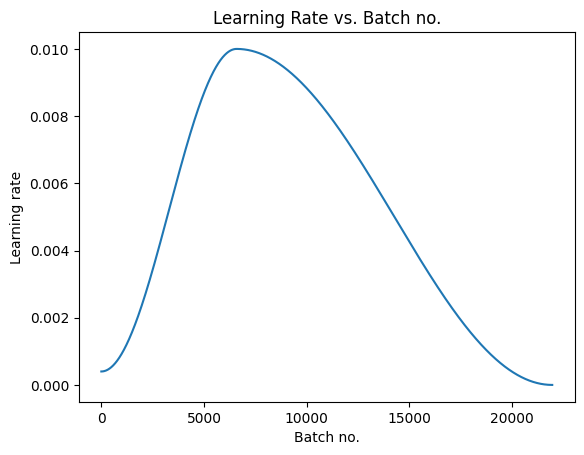

In [ ]:
plot_lrs(history)

In [ ]:
test_dir = "/content/test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [ ]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [ ]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust


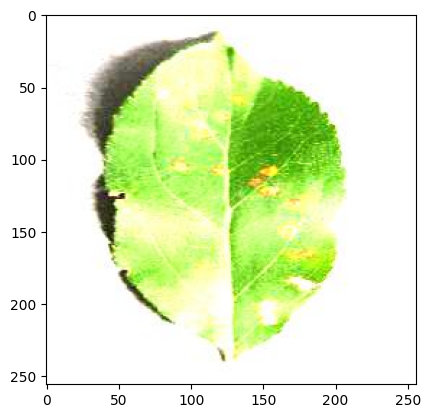

In [ ]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab
Label: AppleScab3.JPG , Predicted: Apple___Apple_scab
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight
Label: PotatoHealthy1.JPG , Predicted: Potato___h

In [ ]:
import torch
torch.save(model, 'plant_disease_prediction_model.pth')


NameError: name 'model' is not defined